# To predict the Happiness Score.

In [1]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('happiness_score_dataset.csv')
df

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [3]:
df.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

In [4]:
df.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


# Checking Null Values

In [5]:
df.isnull()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
153,False,False,False,False,False,False,False,False,False,False,False,False
154,False,False,False,False,False,False,False,False,False,False,False,False
155,False,False,False,False,False,False,False,False,False,False,False,False
156,False,False,False,False,False,False,False,False,False,False,False,False


In [6]:
df.isnull().sum().sum()

0

We don't have any null values we can proceed further.

In [7]:
df.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

# DataFrame Description:

On the basis of the given features of the people we have to predict the happiness score of the Dystopia Residual.

The dataset contains the data of 'Country', 'Region', 'Happiness Rank', 'Happiness Score', 'Standard Error', 'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)', 'Generosity', 'Dystopia Residual'

# Checking the datatypes of the columns.

In [8]:
df.dtypes

Country                           object
Region                            object
Happiness Rank                     int64
Happiness Score                  float64
Standard Error                   float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Dystopia Residual                float64
dtype: object

# Making DataFrame for the Nominal Data

In [9]:
df_visualization_nominal=df[['Country', 'Region', 'Happiness Rank', 'Happiness Score', 'Standard Error', 'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)', 'Generosity', 'Dystopia Residual']].copy()

In [10]:
id(df)

2829107538720

In [11]:
id(df_visualization_nominal)

2829197670096

In [12]:
df_copy=df.copy(deep=False)

In [13]:
id(df_copy)

2829197745792

In [14]:
df_visualization_nominal.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

# Checking the distribution of the continuous values.

In [15]:
df_visualization_nominal.skew()

Happiness Rank                   0.000418
Happiness Score                  0.097769
Standard Error                   1.983439
Economy (GDP per Capita)        -0.317575
Family                          -1.006893
Health (Life Expectancy)        -0.705328
Freedom                         -0.413462
Trust (Government Corruption)    1.385463
Generosity                       1.001961
Dystopia Residual               -0.238911
dtype: float64

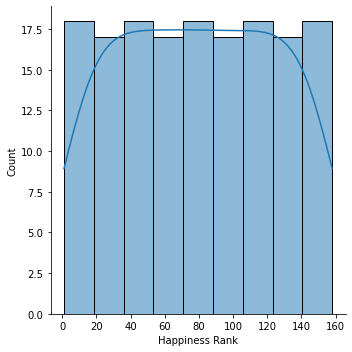

In [16]:
sns.displot(df_visualization_nominal['Happiness Rank'], kde=True)

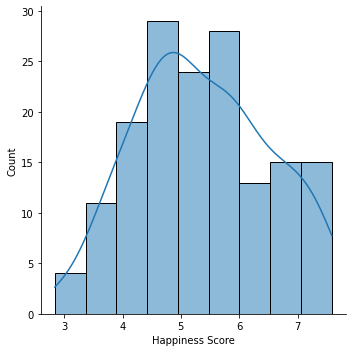

In [17]:
sns.displot(df_visualization_nominal['Happiness Score'], kde=True)

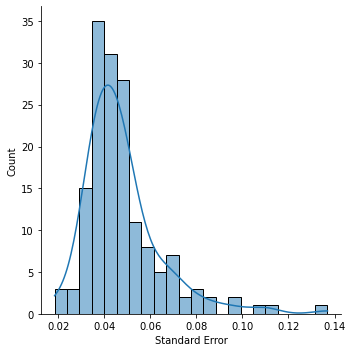

In [18]:
sns.displot(df_visualization_nominal['Standard Error'], kde=True)

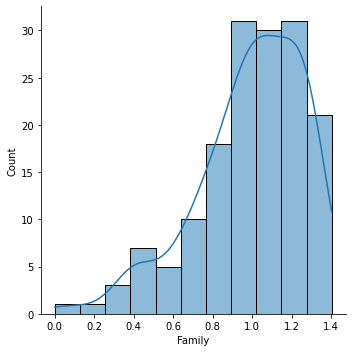

In [19]:
sns.displot(df_visualization_nominal['Family'], kde=True)

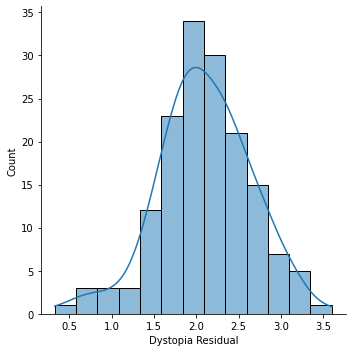

In [20]:
sns.displot(df_visualization_nominal['Dystopia Residual'], kde=True)

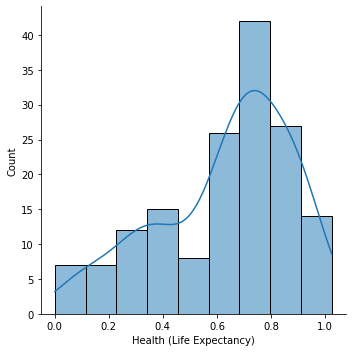

In [21]:
sns.displot(df_visualization_nominal['Health (Life Expectancy)'], kde=True)

Dataset has string values for Country and Religion. We have to encode it for further steps.

# Encoding of DataFrame

In [22]:
from sklearn.preprocessing import OrdinalEncoder
enc=OrdinalEncoder()

In [23]:
for i in df.columns:
    if df[i].dtypes=="object":
        df[i]=enc.fit_transform(df[i].values.reshape(-1,1))
        
df

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,135.0,9.0,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,58.0,9.0,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,37.0,9.0,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,105.0,9.0,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,24.0,5.0,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,118.0,8.0,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,13.0,8.0,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,136.0,4.0,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,21.0,8.0,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [24]:
df.dtypes

Country                          float64
Region                           float64
Happiness Rank                     int64
Happiness Score                  float64
Standard Error                   float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Dystopia Residual                float64
dtype: object

# Description of the Dataset:

In [25]:
df.describe()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,78.500000,5.120253,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754781,2.993321,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,0.000000,0.000000,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,39.250000,3.000000,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,78.500000,4.500000,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,117.750000,8.000000,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,157.000000,9.000000,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


In [26]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Country,158.0,78.500000,45.754781,0.00000,39.250000,78.500000,117.750000,157.00000
Region,158.0,5.120253,2.993321,0.00000,3.000000,4.500000,8.000000,9.00000
Happiness Rank,158.0,79.493671,45.754363,1.00000,40.250000,79.500000,118.750000,158.00000
Happiness Score,158.0,5.375734,1.145010,2.83900,4.526000,5.232500,6.243750,7.58700
Standard Error,158.0,0.047885,0.017146,0.01848,0.037268,0.043940,0.052300,0.13693
Economy (GDP per Capita),158.0,0.846137,0.403121,0.00000,0.545808,0.910245,1.158448,1.69042
Family,158.0,0.991046,0.272369,0.00000,0.856823,1.029510,1.214405,1.40223
Health (Life Expectancy),158.0,0.630259,0.247078,0.00000,0.439185,0.696705,0.811013,1.02525
Freedom,158.0,0.428615,0.150693,0.00000,0.328330,0.435515,0.549092,0.66973
Trust (Government Corruption),158.0,0.143422,0.120034,0.00000,0.061675,0.107220,0.180255,0.55191


<AxesSubplot:>

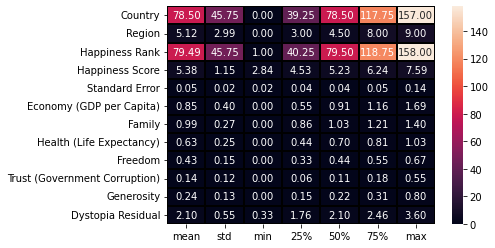

In [27]:
sns.heatmap(df.describe()[1:].transpose(),annot=True,linewidths=0.1,linecolor='black',fmt='0.2f')

# Correlation of the columns with the target columns:

In [28]:
df.corr()['Happiness Score'].sort_values()

Happiness Rank                  -0.992105
Standard Error                  -0.177254
Region                          -0.176791
Country                          0.083380
Generosity                       0.180319
Trust (Government Corruption)    0.395199
Dystopia Residual                0.530474
Freedom                          0.568211
Health (Life Expectancy)         0.724200
Family                           0.740605
Economy (GDP per Capita)         0.780966
Happiness Score                  1.000000
Name: Happiness Score, dtype: float64

<AxesSubplot:>

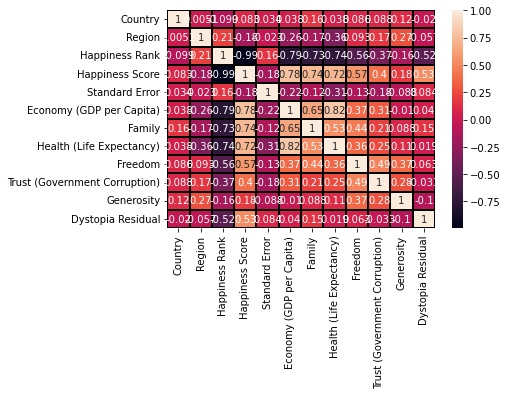

In [29]:
sns.heatmap(df.corr(),annot=True,linewidths=0.1,linecolor="black")

Checking the columns which are positively and negatively correlated with the target columns

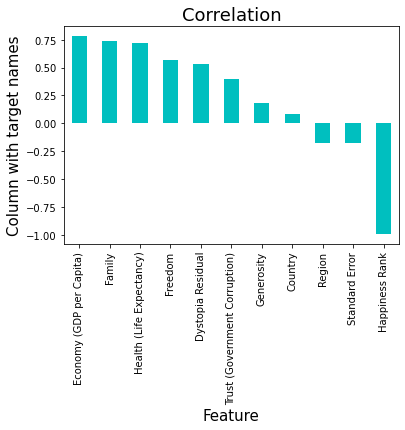

In [31]:
df.corr()['Happiness Score'].sort_values(ascending=False).drop(['Happiness Score']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=15)
plt.ylabel('Column with target names',fontsize=15)
plt.title('Correlation',fontsize=18)
plt.show()

In [33]:
df.skew().sort_values()

Family                          -1.006893
Health (Life Expectancy)        -0.705328
Freedom                         -0.413462
Economy (GDP per Capita)        -0.317575
Dystopia Residual               -0.238911
Region                          -0.116119
Country                          0.000000
Happiness Rank                   0.000418
Happiness Score                  0.097769
Generosity                       1.001961
Trust (Government Corruption)    1.385463
Standard Error                   1.983439
dtype: float64

# Outliers Check

In [34]:
df.dtypes

Country                          float64
Region                           float64
Happiness Rank                     int64
Happiness Score                  float64
Standard Error                   float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Dystopia Residual                float64
dtype: object

<AxesSubplot:>

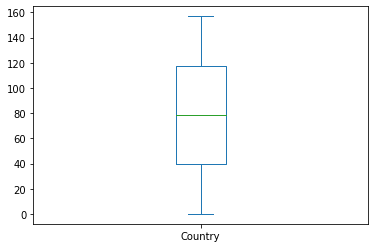

In [35]:
df['Country'].plot.box()

<AxesSubplot:>

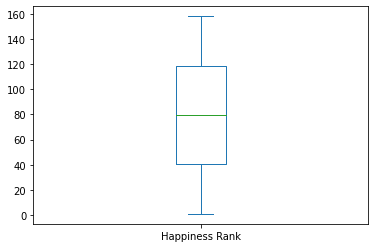

In [36]:
df['Happiness Rank'].plot.box()

<AxesSubplot:>

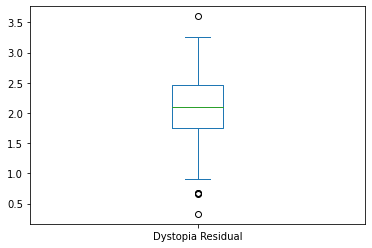

In [38]:
df['Dystopia Residual'].plot.box()

<AxesSubplot:>

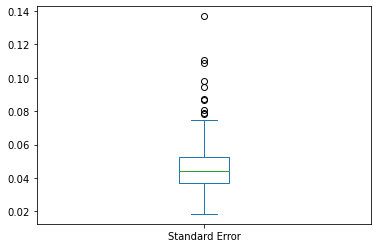

In [39]:
df['Standard Error'].plot.box()

<AxesSubplot:>

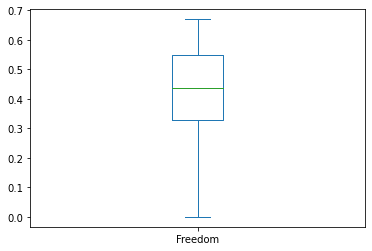

In [40]:
df['Freedom'].plot.box()

<AxesSubplot:>

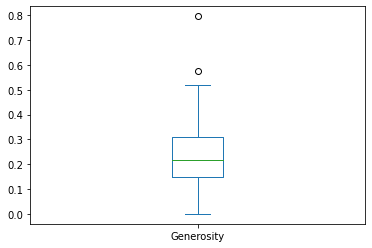

In [41]:
df['Generosity'].plot.box()

<AxesSubplot:>

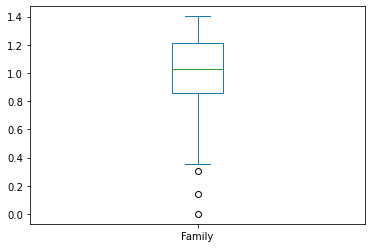

In [42]:
df['Family'].plot.box()

<AxesSubplot:>

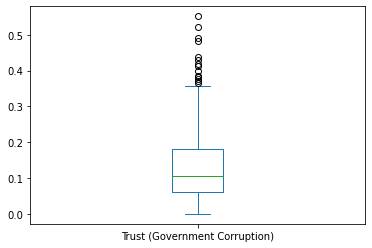

In [43]:
df['Trust (Government Corruption)'].plot.box()

# Removing the Outliers

In [44]:
df.shape

(158, 12)

In [45]:
from scipy.stats import zscore
import numpy as np

z=np.abs(zscore(df))
threshold=3
np.where(z>3)

(array([ 27,  40,  64, 115, 128, 147, 153, 155, 157], dtype=int64),
 array([ 9,  4,  4,  4, 10,  6,  9, 11,  6], dtype=int64))

In [47]:
df_new=df[(z<3).all(axis=1)]
df_new

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,135.0,9.0,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,58.0,9.0,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,37.0,9.0,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,105.0,9.0,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,24.0,5.0,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
150,66.0,8.0,151,3.655,0.05141,0.46534,0.77115,0.15185,0.46866,0.17922,0.20165,1.41723
151,20.0,8.0,152,3.587,0.04324,0.25812,0.85188,0.27125,0.39493,0.12832,0.21747,1.46494
152,0.0,7.0,153,3.575,0.03084,0.31982,0.30285,0.30335,0.23414,0.09719,0.36510,1.95210
154,13.0,8.0,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328


In [48]:
df.shape

(158, 12)

In [49]:
df_new.shape

(149, 12)

In [50]:
# Percentage loss of data:

Data_loss=((158-149)/158)*100
Data_loss

5.69620253164557

# Seperating the columns into features and Target

In [51]:
features=df.drop("Happiness Score",axis=1)
target=df["Happiness Score"]

# Scaling tha data using Min-Max Scaler

In [52]:
from sklearn.preprocessing import MinMaxScaler
mns=MinMaxScaler()
from sklearn.metrics import r2_score

In [54]:
lr=LinearRegression()

In [55]:
for i in range(0,100):
    features_train,features_test,target_train,target_test=train_test_split(features,target,test_size=0.2,random_state=i)
    lr.fit(features_train,target_train)
    pred_train=lr.predict(features_train)
    pred_test=lr.predict(features_test)
    print(f"At random state {i}, the training accuracy is:- {r2_score(target_train,pred_train)}")
    print(f"At random state {i}, the testing accuracy is:- {r2_score(target_test,pred_test)}")
    print("\n")

At random state 0, the training accuracy is:- 0.9999999514441257
At random state 0, the testing accuracy is:- 0.999999902494247


At random state 1, the training accuracy is:- 0.9999999444138908
At random state 1, the testing accuracy is:- 0.9999999394454414


At random state 2, the training accuracy is:- 0.9999999405491521
At random state 2, the testing accuracy is:- 0.9999999523828854


At random state 3, the training accuracy is:- 0.9999999420745156
At random state 3, the testing accuracy is:- 0.9999999470792729


At random state 4, the training accuracy is:- 0.9999999379277369
At random state 4, the testing accuracy is:- 0.9999999520348243


At random state 5, the training accuracy is:- 0.9999999487684214
At random state 5, the testing accuracy is:- 0.9999999027545904


At random state 6, the training accuracy is:- 0.9999999463039511
At random state 6, the testing accuracy is:- 0.9999999338566166


At random state 7, the training accuracy is:- 0.9999999443622295
At random state 7, 

In [56]:
features_train,features_test,target_train,target_test=train_test_split(features,target,test_size=0.2,random_state=12)

In [57]:
# Train the model

lr.fit(features_train,target_train)

LinearRegression()

In [58]:
pred_test=lr.predict(features_test)

In [59]:
print(r2_score(target_test,pred_test))

0.9999999439158268


# Cross-Validation of the model:

In [60]:
Train_accuracy=r2_score(target_train,pred_train)
Test_accuracy=r2_score(target_test,pred_test)

from sklearn.model_selection import cross_val_score

for j in range(2,10):
    cv_score=cross_val_score(lr,features,target,cv=j)
    cv_mean=cv_score.mean()
    print(f"At cross fold {j} the cv score is {cv_mean} accuracy score of training is {Train_accuracy} and accuracy score of testing is {Test_accuracy}")
    print("\n")

At cross fold 2 the cv score is 0.9999997284501867 accuracy score of training is -0.9329836014511426 and accuracy score of testing is 0.9999999439158268


At cross fold 3 the cv score is 0.9999994758122854 accuracy score of training is -0.9329836014511426 and accuracy score of testing is 0.9999999439158268


At cross fold 4 the cv score is 0.9999988371717737 accuracy score of training is -0.9329836014511426 and accuracy score of testing is 0.9999999439158268


At cross fold 5 the cv score is 0.9999982417917263 accuracy score of training is -0.9329836014511426 and accuracy score of testing is 0.9999999439158268


At cross fold 6 the cv score is 0.9999971509064253 accuracy score of training is -0.9329836014511426 and accuracy score of testing is 0.9999999439158268


At cross fold 7 the cv score is 0.99999580182807 accuracy score of training is -0.9329836014511426 and accuracy score of testing is 0.9999999439158268


At cross fold 8 the cv score is 0.9999955494387556 accuracy score of tra

Here we have to handle the problem of the overfitting and the underfitting by checking the training ans testing score.

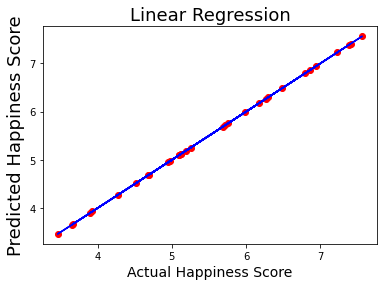

In [62]:
plt.scatter(x=target_test, y=pred_test, color='r')
plt.plot(target_test,target_test,color='b')
plt.xlabel('Actual Happiness Score', fontsize=14)
plt.ylabel('Predicted Happiness Score',fontsize=18)
plt.title('Linear Regression', fontsize=18)
plt.savefig('lr.png')
plt.show()

# Regularization

In [64]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

In [65]:
from sklearn.linear_model import Lasso

parameters={'alpha':[.0001,.001,.01,.1,1,10],
           'random_state':list(range(0,10))}

ls=Lasso()
clf=GridSearchCV(ls,parameters)
clf.fit(features_train,target_train)

print(clf.best_params_)

{'alpha': 0.0001, 'random_state': 0}


In [66]:
# Final model training

ls=Lasso(alpha=0.0001,random_state=0)
ls.fit(features_train,target_train)
ls_score_training=ls.score(features_train,target_train)
pred_ls=ls.predict(features_test)
ls_score_training*100

99.99805570775266

In [67]:
pred_ls=ls.predict(features_test)

In [68]:
lss=r2_score(target_test,pred_ls)
lss*100

99.99889398347645

In [69]:
cv_score=cross_val_score(ls,features,target,cv=5)
cv_mean=cv_score.mean()
cv_mean*100

99.87116482551454

# Ensemble Technique:

In [70]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

parameters={'criterion':['mse','mae'],
           'max_features':['auto','sqrt','log2']}

rf=RandomForestRegressor()
clf=GridSearchCV(rf,parameters)
clf.fit(features_train,target_train)

print(clf.best_params_)

{'criterion': 'mse', 'max_features': 'auto'}


In [71]:
rf=RandomForestRegressor(criterion="mse",max_features='auto')
rf.fit(features_train,target_train)
train_r2=rf.score(features_train,target_train)
pred_decision=rf.predict(features_test)
print('Training r2',train_r2)

rfs=r2_score(target_test,pred_decision)
print('R2 Score:',rfs*100)

rfscore=cross_val_score(rf,features,target,cv=5)
rfc=rfscore.mean()
print('Cross Val Score:',rfc*100)

Training r2 0.9994710981602646
R2 Score: 99.9307309284949
Cross Val Score: -162.71931354536028


# Saving the Model:

In [72]:
import pickle
filename='Happiness.pkl'
pickle.dump(rf, open(filename,'wb'))

# Conclusion

In [73]:
loaded_model=pickle.load(open('Happiness.pkl','rb'))
result=loaded_model.score(features_test,target_test)
print(result*100)

99.9307309284949


In [74]:
conclusion=pd.DataFrame([loaded_model.predict(features_test)[:],pred_decision[:]],index=['Predicted','Original'])

In [75]:
conclusion

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
Predicted,5.08253,4.51826,5.99801,3.91301,6.50354,6.81855,3.49241,3.919,5.06864,4.67111,...,5.66799,6.26457,7.40892,7.33341,5.77977,7.45787,3.68465,5.00966,5.73641,7.22864
Original,5.08253,4.51826,5.99801,3.91301,6.50354,6.81855,3.49241,3.919,5.06864,4.67111,...,5.66799,6.26457,7.40892,7.33341,5.77977,7.45787,3.68465,5.00966,5.73641,7.22864


In [76]:
conclusion.transpose()

,Predicted,Original
0,5.08253,5.08253
1,4.51826,4.51826
2,5.99801,5.99801
3,3.91301,3.91301
4,6.50354,6.50354
5,6.81855,6.81855
6,3.49241,3.49241
7,3.91900,3.91900
8,5.06864,5.06864
9,4.67111,4.67111
